In [177]:
import numpy as np
import matplotlib.pyplot as plt

# Daten laden

In [178]:
! ls Messungen

10.csv            25.csv            43.csv            61.csv
13.csv            28.csv            46.csv            64.csv
16.csv            31.csv            49.csv            67.csv
19.csv            34.csv            52.csv            70.csv
20211115-0001.csv 37.csv            55.csv            blattB.csv
22.csv            40.csv            58.csv            blattL.csv


In [179]:
def conv(x):
    return x.replace(',', '.').encode()

In [180]:
data = []
distances = []
for idx in range(10,73,3):
    distances.append(idx)
    data.append(
      np.genfromtxt((conv(x) for x in open(f"Messungen/{idx}.csv")),
      delimiter=';', skip_header=1000, usecols=(1)))
    print("Loading: ",idx)
data = np.array(data)
print("Shape of Data: ",data.shape)

Loading:  10
Loading:  13
Loading:  16
Loading:  19
Loading:  22
Loading:  25
Loading:  28
Loading:  31
Loading:  34
Loading:  37
Loading:  40
Loading:  43
Loading:  46
Loading:  49
Loading:  52
Loading:  55
Loading:  58
Loading:  61
Loading:  64
Loading:  67
Loading:  70
Shape of Data:  (21, 98213)


In [181]:
a4_length = np.genfromtxt((conv(x) for x in open("Messungen/blattL.csv")),
      delimiter=';', skip_header=1000, usecols=(1))
a4_width = np.genfromtxt((conv(x) for x in open("Messungen/blattB.csv")),
      delimiter=';', skip_header=1000, usecols=(1))


# Data Processing

In [200]:
data_mean = []
data_std = []
for e in data:
    data_mean.append(np.mean(e))
    data_std.append(np.std(e))

In [201]:
data_mean_upper = []
data_mean_lower = []
for idx in range(len(data_mean)):
    data_mean_upper.append(data_mean[idx]+data_std[idx])
    data_mean_lower.append(data_mean[idx]-data_std[idx])

# Plot

<IPython.core.display.Javascript object>


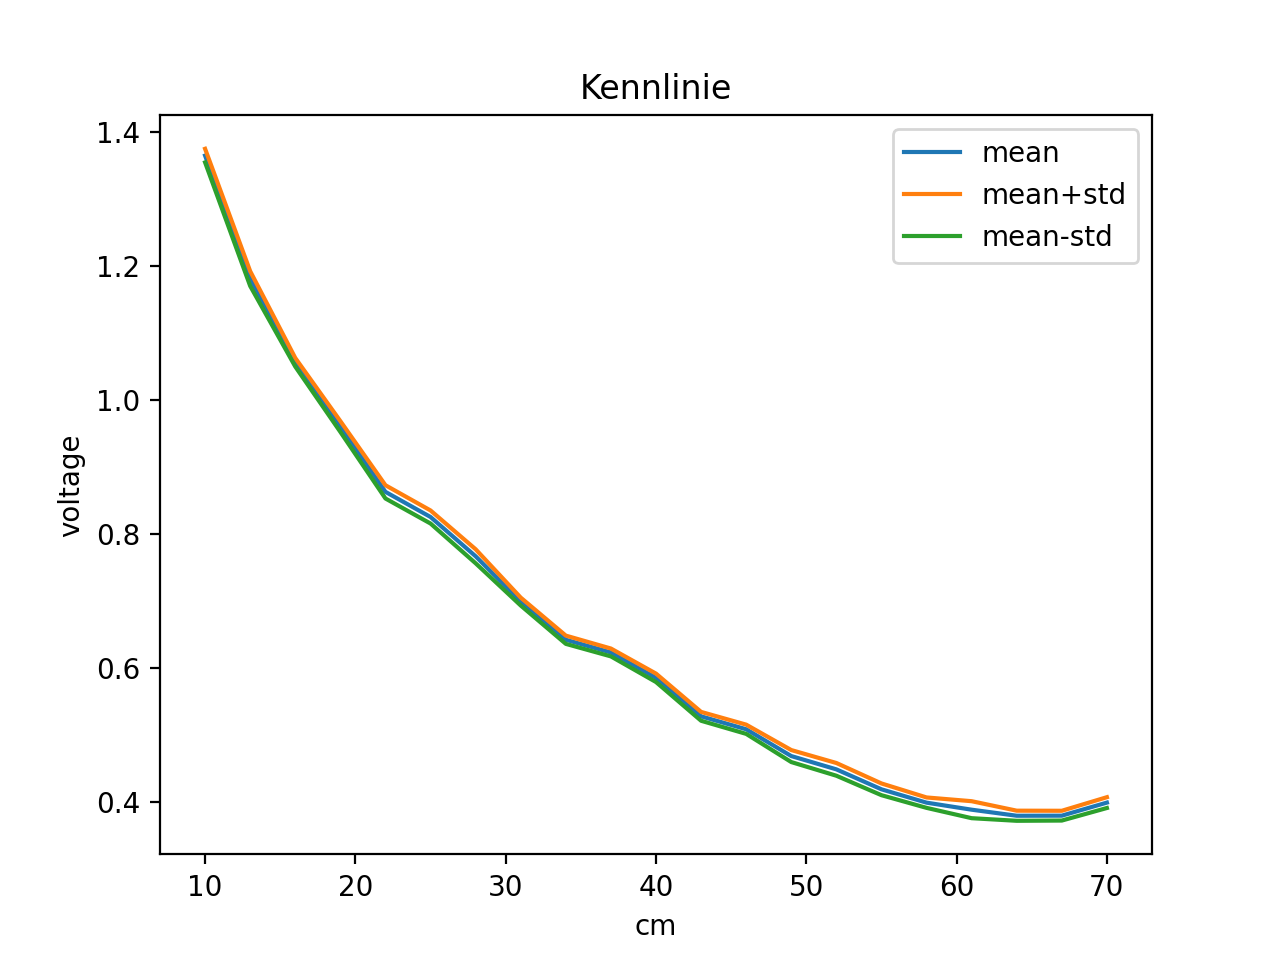

In [202]:
%matplotlib notebook

plt.plot(distances, data_mean, label="mean")
plt.plot(distances, data_mean_upper, label="mean+std")
plt.plot(distances, data_mean_lower, label="mean-std")
plt.xlabel('cm')
plt.ylabel('voltage')
plt.title('Kennlinie')
plt.legend()

# Lineare Regression

In [203]:
def linReg(xs,ys):
    assert len(xs) == len(ys)
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)
    upper = 0
    lower = 0
    for idx in range(len(xs)):
        upper += ( (xs[idx] - x_mean) * (ys[idx] - y_mean) )
        lower += ( (xs[idx]-x_mean)**2 )
    a = upper / lower
    b = y_mean - (a*x_mean)
    return a,b

In [204]:
ordered_data = np.array(list(zip(distances,data_mean)))

In [205]:
ordered_data

x_log = np.log(ordered_data[:,0])
y_log = np.log(ordered_data[:,1])

In [206]:
a,b = linReg(x_log,y_log)
print(f"a = {a} , b = {b}")
reg_log_x = [a*x + b for x in x_log]

a = -0.7098802886904118 , b = 2.0297905301605588


# Linear Plot

<IPython.core.display.Javascript object>


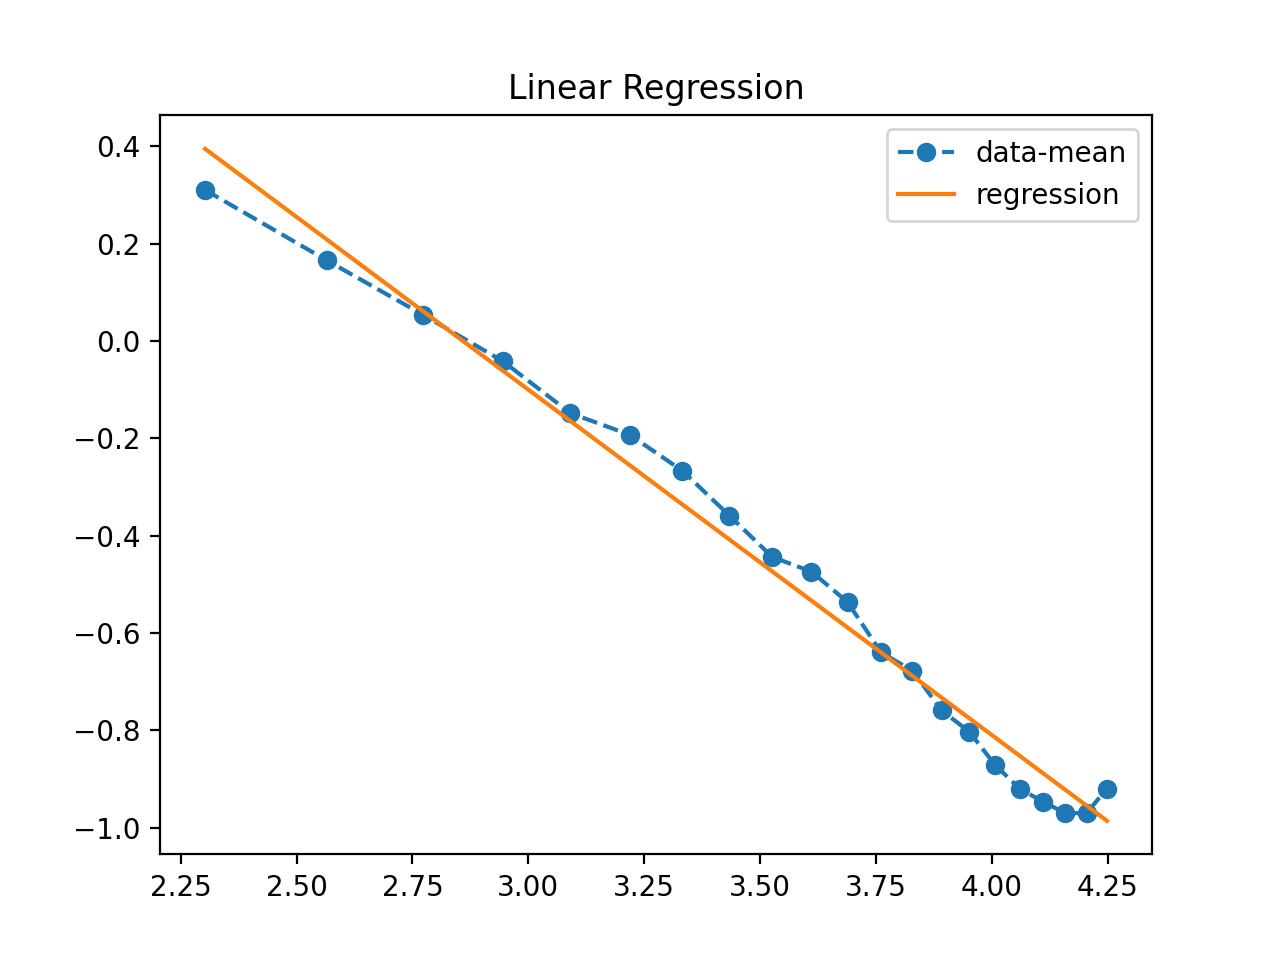

Text(0.5, 1.0, 'Linear Regression')

In [207]:
%matplotlib notebook
plt.plot(x_log,y_log,'o--')
plt.plot(x_log,reg_log_x)
plt.legend(['data-mean','regression'])
plt.title("Linear Regression")

# Exponential Plot

In [208]:
xs = np.exp(x_log)
ys = np.exp(y_log)
reg_x = np.exp(reg_log_x)

<IPython.core.display.Javascript object>


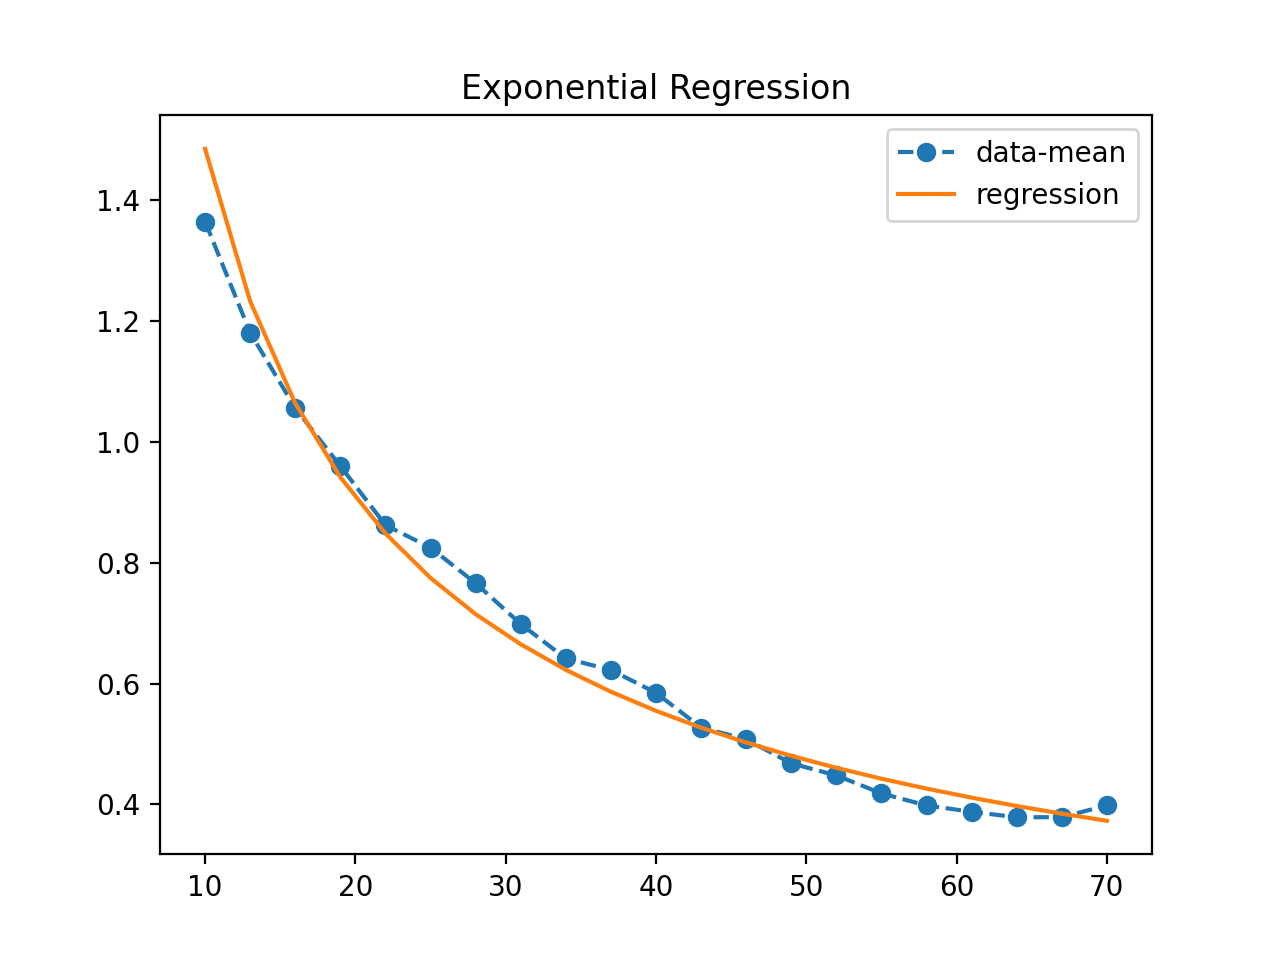

Text(0.5, 1.0, 'Exponential Regression')

In [209]:
%matplotlib notebook
plt.plot(xs,ys,'o--')
plt.plot(xs,reg_x)
plt.legend(['data-mean','regression'])
plt.title("Exponential Regression")

# Fehlerrechnung

In [210]:
import sympy as sy

In [211]:
x = sy.symbols('x')